# Декомпозиция 

#### Шаг 1. Импортируем файл с данными, и изучим общую информацию о датасете

#### Шаг 2. Подготовка и предобработка данных
- заменим названия столбцов на удобные для нас;
- проверим пропуски и типы данных. Проанализируем причины их наличия, и откорректируем если нужно;
- агрегируем и добавим дополнительные столбцы, необходимые для дальнейшего исследования. Например отдельный столбец с вилкой дохода или другую агрегированную переменную;

#### Шаг 3. Проведем исследовательский анализ данных
- cколько всего уникальных клиентов в датасете?
- посмотрим доли клиентов в оттоке("1")
- посмотрим доли активных клиентов, клиентов с 0-ым количеством продуктов и, имеющих кредитную карту
- посмотрим доли клиентов с группировкой по городам
- построим графики распределения значений признаков с группировкой по "оттоку", а также проанализируем средние значения этих признаков. Отдельно разберем аномальные значения и обработаем их

#### Шаг 4. Сегментация
- выделим диапазоны по количеству продуктов у клиентов, и напишем цикл для создания колонки с названием сегмента. Названия зададим сами
- сгруппируем клиентов по сегментам и построим графики распределения признаков
- также построим и изучим распределение средних значений признаков для кластеров
- далее для каждого сегмента посчитаем долю оттока и выделим какие кластеры склонны к оттоку

#### Шаг 5. Сформулируем и проверим две гипотезы:
- различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним
- различия среднего возраста между клиентами с признаком оттока("1") и постоянными("0")

- после формулировки гипотез, проверим соотношение размеров выборок и наличие выбросов в распределениях
- посчитаем 95 и 99 перцентили уровня дохода на клиента и выделим границы для аномальных средних значений
- посчитаем статистическую занчимость различия средних значений по "сырым" и по "очищенным" данным. Применим непараметрический тест Манна-Уитни и вычислим относительное различие в среднем между группами, т.к. имеем 2 массива данных, разделенных по группе

#### Шаг 6. Напишем общие выводы и рекомендации

#### Шаг 7. Оформим результаты исследования в презентацию для маркетологов и продуктовых аналитиков Заказчика

# Проект исследования клиентов Банка "Метанпром"

### Описание проекта: 

Региональный банк "Метанпром" заказал исследование его клиентской базы на количество используемых клиентами продуктов, а также критерии влияющие на отток. 

Наша задача провести исследовательский и статистический анализ данных клиентов, и их потреблении продуктов за определенный период, проверить пару гипотез и выявить закономерности и признаки, влияющие на склонность клиентов к оттоку.

### Описание данных:

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Импорт библиотек и данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

import os

In [2]:
pth1 = r'D:\Yandex_Practikum\Final_project\bank_dataset.csv'
pth2 = '/datasets/bank_dataset.csv'

if os.path.exists(pth1):
    clients = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    clients = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')
          
display(clients.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Предобработка данных

In [4]:
clients.columns = clients.columns.str.lower() # приведем названия столбцов к единому регистру

In [5]:
clients = clients.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

In [6]:
def income_category(row):
    if row['estimated_salary'] <= 50000: # категоризириуем данные столбца с уровнем дохода клиента
        return 'D'
    if row['estimated_salary'] <= 100000:
        return 'C'
    if row['estimated_salary'] <= 150000:
        return 'B'
    return 'A' 

clients['salary_category'] = clients.apply(income_category, axis=1)

display(clients.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,salary_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,B
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,B
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,B
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,C
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,C


##### Мы добавили категории клиентов по уровню дохода, т.к. это один из ключевых признаков для Банка

In [7]:
print('Пропуски:', clients.isna().sum())
print('Дубликаты:', clients.duplicated().sum())
(clients.describe()).round(2)

Пропуски: user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
salary_category        0
dtype: int64
Дубликаты: 0


,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.92,0.0
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


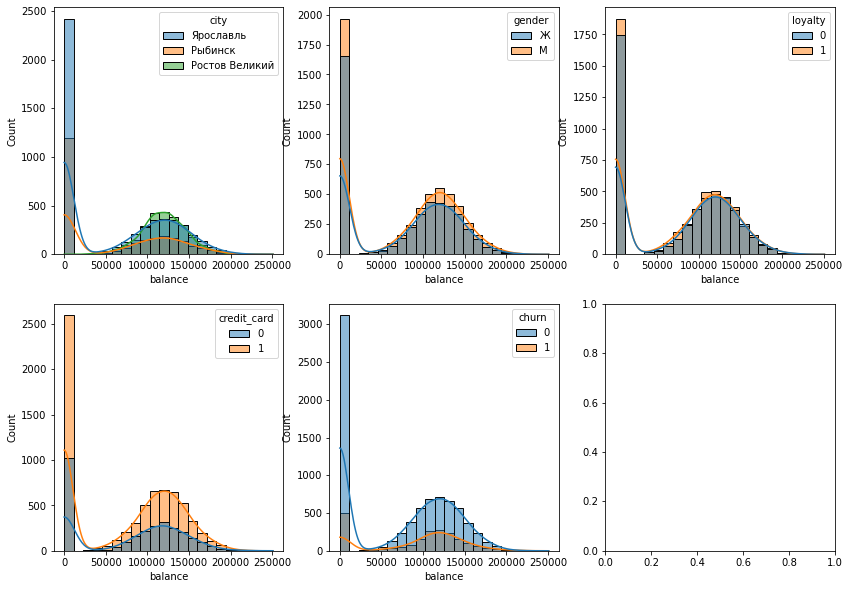

In [8]:
# исследуем причины пропусков

clients_na = clients
clients_na = clients_na.fillna(value=0) # заполним пропуски 0 для их идентификации в разрезах

fig, axs = plt.subplots(2, 3, figsize=(14, 10))
plt.subplot(2, 3, 1)
sns.histplot(x='balance', data=clients_na, hue='city', kde=True)
plt.subplot(2, 3, 2)
sns.histplot(x='balance', data=clients_na, hue='gender', kde=True)
plt.subplot(2, 3, 3)
sns.histplot(x='balance', data=clients_na, hue='loyalty', kde=True)
plt.subplot(2, 3, 4)
sns.histplot(x='balance', data=clients_na, hue='credit_card', kde=True)
plt.subplot(2, 3, 5)
sns.histplot(x='balance', data=clients_na, hue='churn', kde=True)
plt.show()

In [9]:
print(clients_na.groupby('salary_category')['balance'].count())

salary_category
A    2455
B    2555
C    2537
D    2453
Name: balance, dtype: int64


<div class="alert alert-info">
    
- Пропуски присутствуют только в колонке с балансом на счете. Возможно это клиенты с нулевым или отрицательным остатком по счету, либо баланс данных счетов конфиденциален. Их доля в датасете значительная.
    - больше всего пропусков у клиентов из Ярославля, раза в 2 меньше из Рыбинска. А клиенты из Ростова Великого не имеют пропусков
    - значительная доля пропусков у владельцев кредитной карты и постоянных клиентов
- Вероятнее всего это: VIP-клиенты с конфиденциальным балансом, корпоративные клиенты или сотрудники Банка со скрытым зарплатным счетом.
- Заполнить приемлемым значением пропуски мы не сможем, т.к. это значительно скосит данные по балансам клиентов.
    
<div>

### Исследовательский анализ данных

In [10]:
print('Kоличество уникальных клиентов:', clients['user_id'].nunique())
print('Процент оттока: ', len(clients.query('churn == 1')) / len(clients) * 100)
print('Процент активных клиентов: ', len(clients.query('loyalty == 1')) / len(clients) * 100)
print('Процент клиентов без продукта: ', len(clients.query('products == 0')) / len(clients) * 100)
print('Процент клиентов с кредитной картой: ', len(clients.query('credit_card == 1')) / len(clients) * 100)

Kоличество уникальных клиентов: 10000
Процент оттока:  20.369999999999997
Процент активных клиентов:  51.51
Процент клиентов без продукта:  0.0
Процент клиентов с кредитной картой:  70.55


<div class="alert alert-info">
    
- все строки данных в датасете с уникальными клиентами
- доля оттока составляет чуть более 20%
- доля активных клиентов 51.5%
- в датасете отсутствуют клиенты без продукта
- доля клиентов с кредитной картой 70.5%
    
<div>

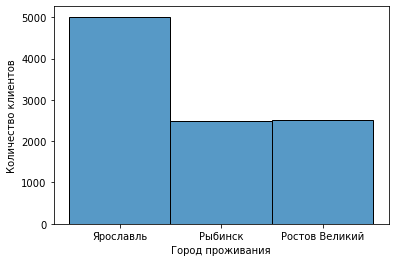

In [11]:
sns.histplot(x='city', data=clients)
plt.ylabel('Количество клиентов')
plt.xlabel('Город проживания')
plt.show()

##### Половина клиентов из Ярославля, остальные: четверть из Рыбинска и четверть из Ростова Великого

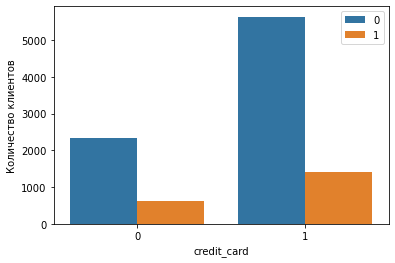

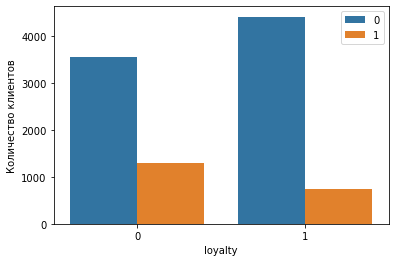

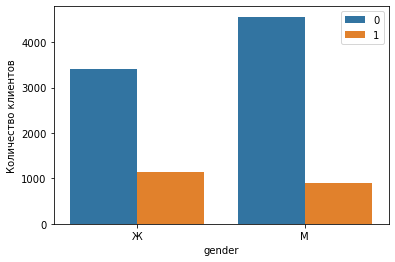

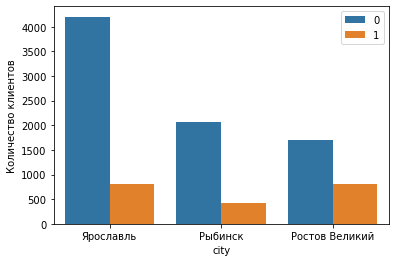

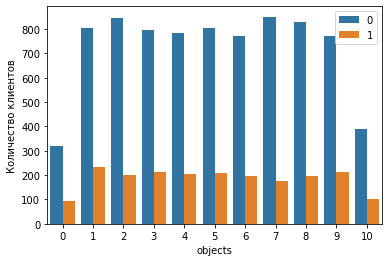

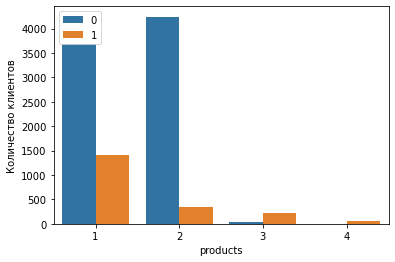

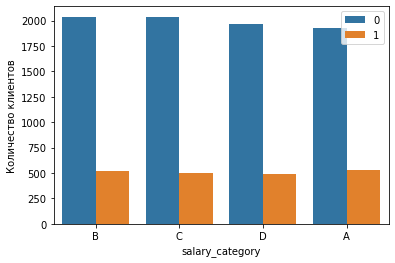

In [12]:
# посмотрим распределения категориальных признаков с разбивкой по оттоку

clients_countplots = pd.DataFrame(clients[['credit_card', 'loyalty', 'gender', 'city', 'objects', 'products', 'salary_category', 'churn']])


for col in clients_countplots.drop(columns=['churn']).columns:
    sns.countplot(x=col, data=clients_countplots, hue='churn')
    plt.ylabel('Количество клиентов')
    plt.legend()
    plt.show()

<div class="alert alert-info">
    
- наличие кредитной карты имеет влияние на отток, более половины всей выборки не склонные к оттоку. Тем более если это активный клиент
- активность клиента в корреляции менее выражена к оттоку. Примерно на 30% меньше клиентов в сегменте "отток" у активных клиентов
- мужчины менее склонны к оттоку, их также по общей доле на 10% больше
- соотношение "доля оттока к доле постоянных" в Ярославле составляет примерно 1 к 5, в Рыбинске 1 к 4, и худший показатель в Ростове Великом примерно 1 к 2
- соотношение "доля оттока к доле постоянных" по количеству объектов в собственности примерно одинаково
- по количеству продуктов у клиента:
    - крайне малая численность у обладателей 3 и 4 продуктов, не более 5% от выборки. Почти все они склонны к оттоку, однако по столь малой выборке нельзя сказать что-то определенно
    - у пользователей одного продукта доля оттока в 3 раза больше, чем у пользователей 2 продуктов. Поэтому пользователи 2 продуктов наименее склонны к оттоку
- уровень дохода практически не влияет на соотношение "доля оттока к доле постоянных"
    
<div>

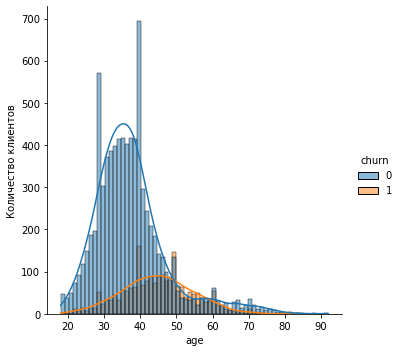

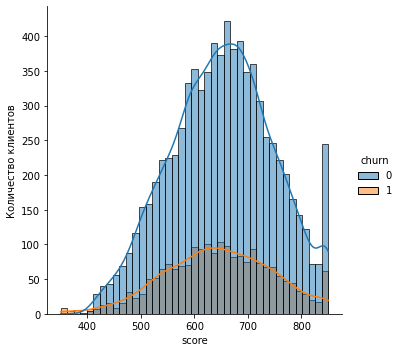

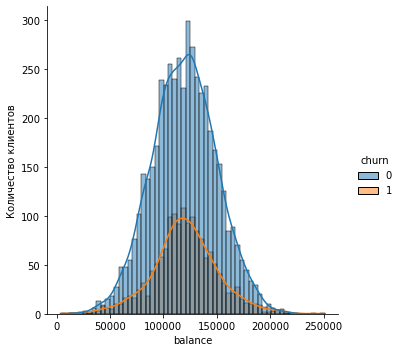

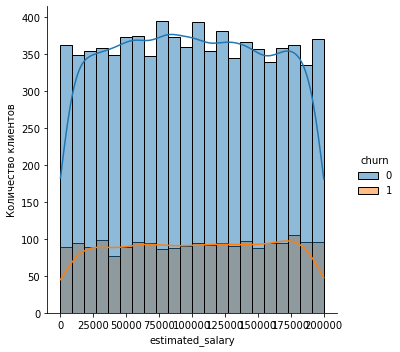

In [13]:
# посмотрим распределения числовых признаков с разбивкой по оттоку

clients_histplots = pd.DataFrame(clients[['age', 'score', 'balance', 'estimated_salary', 'churn']])

for col in clients_histplots.drop(columns=['churn']).columns:
    sns.displot(x=col, data=clients_histplots, hue='churn', kde=True)
    plt.ylabel('Количество клиентов')
    plt.show()

<div class="alert alert-info">
    
- основное распределение по возрасту от 20 до 60. Присутствуют выбросы по возрасту 28 и 39 лет. Склонные к оттоку клиенты более возрастные. Доля оттока к постоянным преобладает в диапазоне возрастов 49-56 лет.
- клиенты с баллами кредитного скоринга менее 400 почти все склонны к оттоку
- баланс на счете и уровень дохода практически не коррелируют со склонностью к оттоку
    
<div>

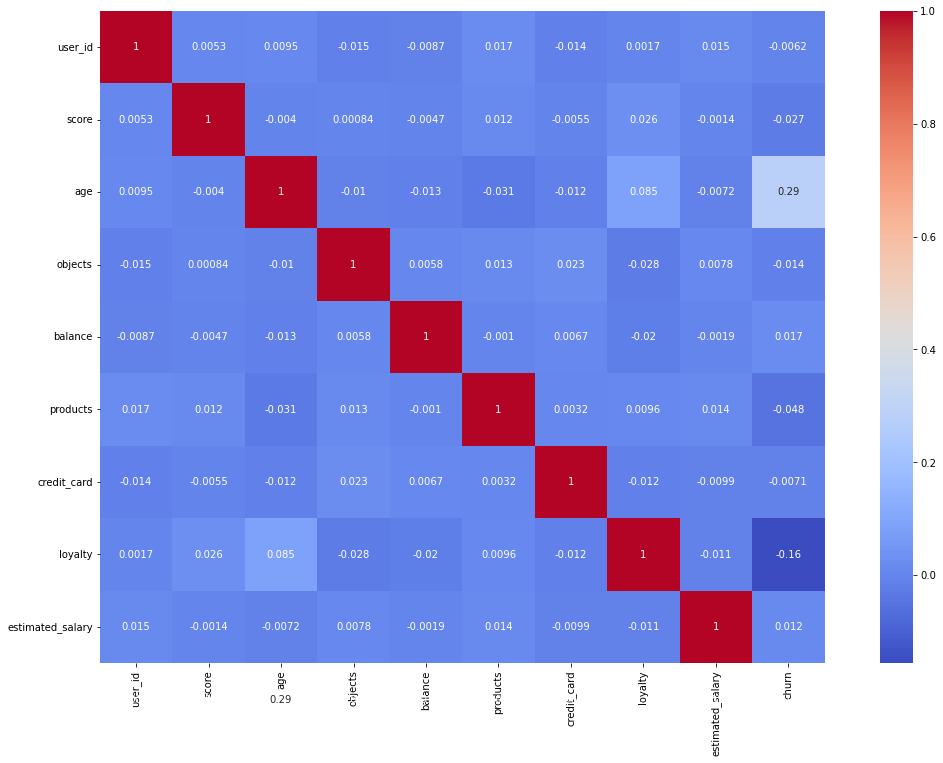

In [14]:
# построим матрицу корреляции признаков

cm = clients.corr()
fig, ax = plt.subplots()

sns.heatmap(cm, annot = True, square=True, cmap='coolwarm')
ax.set_ylim(
    9, 0
)
plt.gcf().set_size_inches(20, 12)
plt.show()

- наибольшую корреляцию с оттоком имеет возраст клиента
- меньше всего влияет на отток активность клиента
- также наблюдается небольшая зависимость от количества продуктов у клиента
- остальные признаки незначительно коррелируют с оттоком

In [15]:
(clients.groupby('churn').mean()).round(2).T.style.background_gradient(cmap='winter', axis=1) # средние значения показателей с разбиением по признаку "отток"

churn,0,1
user_id,15733903.880000,15732787.960000
score,651.850000,645.350000
age,37.410000,44.840000
objects,5.030000,4.930000
balance,119535.860000,120746.970000
products,1.540000,1.480000
credit_card,0.710000,0.700000
loyalty,0.550000,0.360000
estimated_salary,99738.390000,101465.680000


- более склонны к оттоку:
    - клиенты постарше
- менее склонны к оттоку:
    - более активные клиенты
    - имеющие больше балл кредитного скоринга
    - использующие 1-2 продукта

## Сегментация клиентов по количеству используемых продуктов

products
1    5084
2    4590
3     266
4      60
Name: user_id, dtype: int64

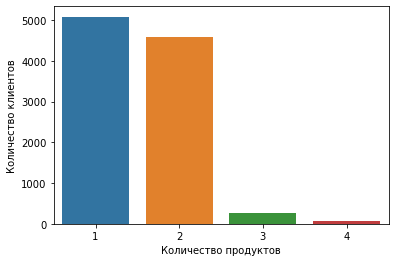

In [16]:
display(clients.groupby('products')['user_id'].count())

sns.countplot(x='products', data=clients_countplots)
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

- чуть более 50% клиентов пользуются только одним продуктом, часть из них пользователи кредитной карты
- около 45% пользуются 2 продуктами
- оставшиеся 5% клиентов используют 3 либо 4 продукта

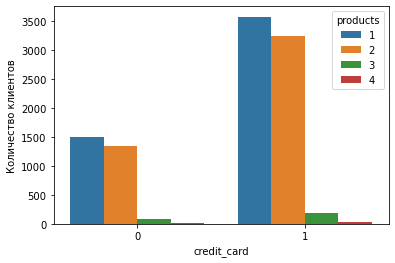

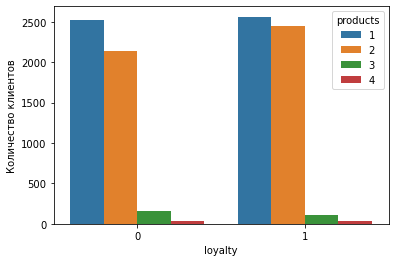

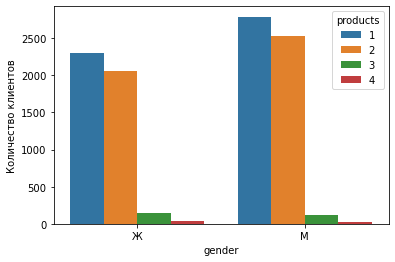

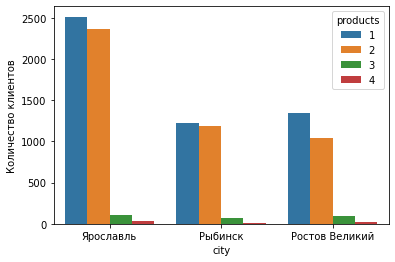

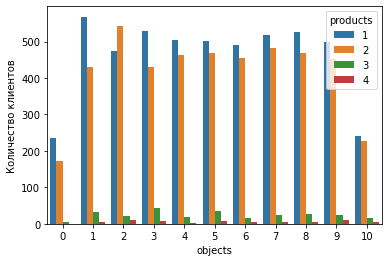

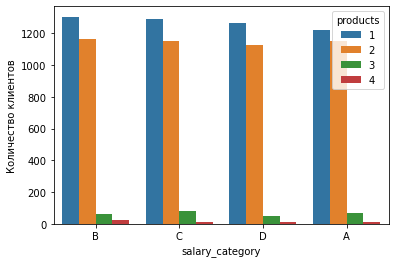

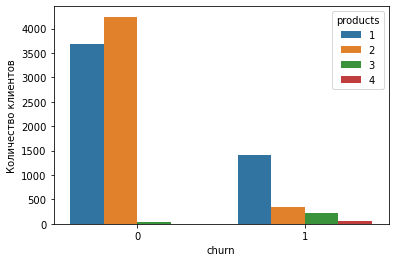

In [17]:
# посмотрим распределения категориальных признаков с разбивкой по количеству продуктов

clients_countplots = pd.DataFrame(clients[['credit_card', 'loyalty', 'gender', 'city', 'objects', 'products', 'salary_category', 'churn']])


for col in clients_countplots.drop(columns=['products']).columns:
    sns.countplot(x=col, data=clients_countplots, hue='products')
    plt.ylabel('Количество клиентов')
    plt.show()

<div class="alert alert-info">
    
- из имеющих 1 продукт, пользуются кредитной картой более 30% от общего количества клиентов в датасете, и примерно такая же доля клиентов с 2 продуктами. Т.е. более 60% клиентов пользуются кредитной картой
- примерно 50% считаются активными
- процентов на 10-15 больше доля клиентов мужского пола
- по количеству объектов в собственности доли клиентов примерно одинаковы. За исключением тех, кто не имеет объектов или имеет 10, их доля в 2 раза меньше относительно остальных
- наиболее склонны к оттоку клиенты с 1 продуктом, а также 3 и 4 продуктами. Причем около 90% от общего числа клиентов с 3 и 4 продуктами попали в отток. Можно было бы сделать выводы, если бы выборка с такими пользователями была больше.
- из клиентов с 1 продуктом в отток попали около 40%
- клиенты с 2 продуктами наименее склонны к оттоку, из них менее 10% попали в "отток"
    
<div>

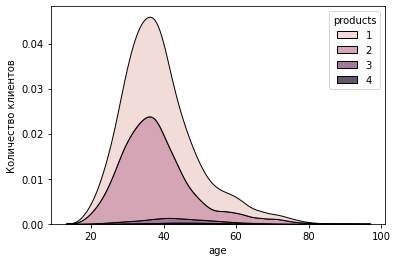

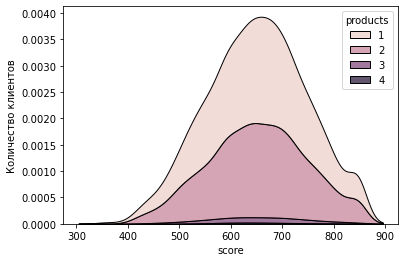

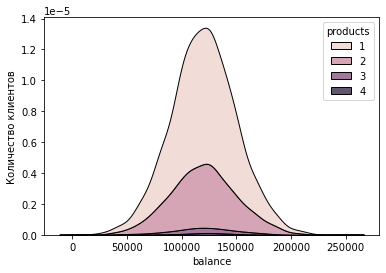

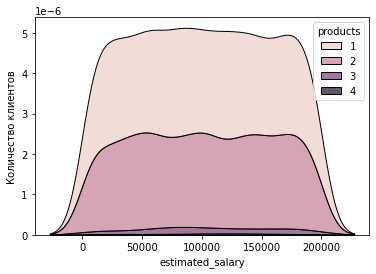

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


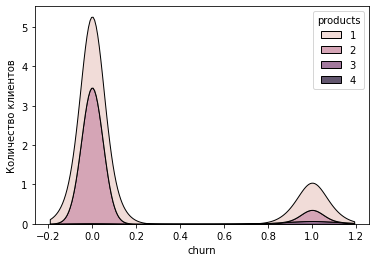

In [18]:
# посмотрим распределения числовых признаков с разбивкой по количеству продуктов

clients_histplots = pd.DataFrame(clients[['age', 'score', 'balance', 'estimated_salary', 'churn', 'products']])
for col in clients_histplots.drop(columns=['products']).columns:
    sns.kdeplot(x=col, data=clients_histplots, hue='products', multiple='stack')
    plt.ylabel('Количество клиентов')
    plt.show()

<div class="alert alert-info">
    
- по возрастному распределению видно что больше одним продуктом пользуются более возрастные клиенты (39-61 лет)
- преимущественно 2 продуктами пользуются более молодые клиенты в диапазоне 19-38 лет. 3 и 4 продукта имеют в основном клиенты в возрасте от 30 до 50 лет
- у клиентов с 1 продуктом кредитный балл в среднем выше, скорее всего это из-за доли кредитных карт у клиентов с 2 продуктами, у которых могут быть оба продукта кредитными
- клиенты с 3-4 продуктами имеют крайне низкий кредитный балл
- распределение по балансу на счете у всех клиентов примерно одинаково, то же самое и по доходам клиентов
- наибольшая доля оттока от общего числа у клиентов с 1 продуктом, большая часть клиентов с 3 и 4 продуктами находятся в оттоке
- клиенты с 2 продуктами наименее склонны к оттоку
    
<div>

In [19]:
clients.groupby('products').mean().T.style.background_gradient(cmap='coolwarm', axis=1) # средние значения показателей с разбиением по признаку "количество продуктов"

products,1,2,3,4
user_id,15732367.899095,15734841.488671,15741816.488722,15719361.266667
score,649.120968,652.188671,648.105263,653.583333
age,39.673092,37.753595,43.195489,45.683333
objects,4.974626,5.051852,5.003759,5.300000
balance,119894.163723,119660.944362,119475.686310,122260.610870
credit_card,0.703777,0.707190,0.714286,0.683333
loyalty,0.504131,0.532898,0.424812,0.483333
estimated_salary,99487.256851,100452.012821,104318.130564,104763.723333
churn,0.277144,0.075817,0.827068,1.000000


##### Таким образом, исходя из данных, можно предположить что клиент начинает с одного продукта, становится лояльным. Если далее приобретает второй продукт, то с 90% вероятностью становится постоянным. Однако если набирает 3-4 продукта, то становится склонным к оттоку. Их можно разделить на сегменты по количеству потребляемых продуктов:
- пользователи 1 продукта - лояльные клиенты
- пользователи 2 продуктов - постоянные клиенты
- пользователи 3-4 продуктов - склонные к оттоку

##### Предположительно в датасете учтены только кредитные продукты, тогда логика сегментации понятна, исходя из кредитной нагрузки клиента: 
- 1 кредитный продукт - легкая нагрузка, но еще не привязывает к Банку
- 2 кредитных продукта - оптимальная нагрузка, вероятнее всего клиент привязывается к Банку надолго
- 3-4 кредитных продукта - нагрузка близка к предельно допустимой либо превышена, клиент рефинансируется либо только гасит платежи, если вообще в состоянии обслуживать долг

In [20]:
# разделим клиентов на 3 сегмента по количеству потребляемых продуктов

def segments(row):
    if row['products'] == 1: # категоризириуем данные столбца с уровнем дохода клиента
        return 'Лояльные клиенты'
    if row['products'] == 2:
        return 'Постоянные клиенты'
    return 'Склонные к оттоку' 

clients['client_category'] = clients.apply(segments, axis=1)

display(clients.head())

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,salary_category,client_category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,B,Лояльные клиенты
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,B,Лояльные клиенты
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,B,Склонные к оттоку
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,C,Постоянные клиенты
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,C,Лояльные клиенты


## Проверка гипотез

#### В последующих проверках гипотез применим непараметрический тест Манна-Уитни

##### Вычислим различия дохода между теми клиентами, которые пользуются 2-мя продуктами банка, и теми, которые пользуются 1-м.

- нулевая гипотеза: уровни показателя дохода клиентов, использующих 2 продукта и, использующих 1 продукт, одинаковы
- альтернативная гипотеза: уровни показателя дохода клиентов, использующих 2 продукта и, использующих 1 продукт, различаются

In [21]:
# сделаем 2 среза с клиентами, использующими 1 и 2 продукта

sample1 = clients.query('products == 1')
sample2 = clients.query('products == 2')

In [22]:
sample1_salary = sample1['estimated_salary']
sample2_salary = sample2['estimated_salary']

alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sample1_salary, sample2_salary)

print("p-значение:{0:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.40796
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
    
Тест Манна-Уитни на статистическую значимость различия уровней показателя у двух групп клиентов (с 1 продуктом и с 2 продуктами) не выявил значимых различий в доходах данных клиентов
    
<div>

##### Вычислим различия среднего возраста между теми клиентами, которые попали в "отток", и теми, кто не попал.

- нулевая гипотеза: уровни показателя возраста клиентов, попавших в "отток" и, не попавших в "отток", одинаковы
- альтернативная гипотеза: уровни показателя возраста клиентов, попавших в "отток" и, не попавших в "отток", различаются

In [23]:
# сделаем 2 среза с клиентами, по признаку "отток"

sampleA = clients.query('churn == 1')
sampleB = clients.query('churn == 0')

In [24]:
sampleA_churn = sampleA['age']
sampleB_churn = sampleB['age']

alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA_churn, sampleB_churn)

print("p-значение:{0:.5f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.00000
Отвергаем нулевую гипотезу


<div class="alert alert-info">
    
Стат. тест не выявил схожести уровней показателя, при этом нулевое р-значение указывает значительную разницу уровней показателя возраста у двух групп клиентов (попавшие в "отток", и не попавшие в "отток")
    
<div>

## Общие выводы и рекомендации

### Подготовка и описание данных
- был импортирован датасет с 10000 клиентов Банка, все типы данных в порядке, заголовки были преобразованы в строчный формат
- пропуски только в колонке с балансом на счете Клиента, более 35% от общего объема данных. Возможно это клиенты с нулевым или отрицательным остатком по счету, либо баланс данных счетов конфиденциален. Их доля в датасете значительная. 
- В срезе данных с пропусками относительно высокие средние показатели кредитного балла, количества объектов и уровня дохода, а также высокая доля постоянных клиентов. Вероятнее всего это: VIP-клиенты с конфиденциальным балансом, корпоративные клиенты или сотрудники Банка со скрытым зарплатным счетом.
- Заполнить приемлемым значением пропуски мы не сможем, т.к. это значительно скосит данные по балансам клиентов.
- провели исследовательский анализ признаков и целевых показателей, построили матрицу корреляции признаков
- проверили пару гипотез относительно оттока

### Исследовательский анализ выборки выявил:
    - все строки данных в датасете с уникальными клиентами
    - доля оттока составляет чуть более 20%
    - доля активных клиентов 51.5%
    - в датасете отсутствуют клиенты без продукта
    - доля клиентов с кредитной картой 70.5%
 
- наличие кредитной карты имеет влияние на отток, более половины всей выборки не склонные к оттоку. Тем более если это активный клиент
- активность клиента в корреляции менее выражена к оттоку. Примерно на 30% меньше клиентов в сегменте "отток" у активных клиентов
- мужчины менее склонны к оттоку, их также по общей доле на 10% больше
- соотношение "доля оттока к доле постоянных" в Ярославле составляет примерно 1 к 5, в Рыбинске 1 к 4, и худший показатель в Ростове Великом примерно 1 к 2

##### По количеству продуктов у клиента:
    - крайне малая численность у обладателей 3 и 4 продуктов, не более 5% от выборки. Почти все они склонны к оттоку, однако по столь малой выборке нельзя сказать что-то определенно
    - у пользователей одного продукта доля оттока в 3 раза больше, чем у пользователей 2 продуктов. Поэтому пользователи 2 продуктов наименее склонны к оттоку
    - основное распределение по возрасту от 20 до 60. Присутствуют выбросы по возрасту 28 и 39 лет. Склонные к оттоку клиенты более возрастные. Доля оттока к постоянным преобладает в диапазоне возрастов 49-56 лет.
    - клиенты с баллами кредитного скоринга менее 400 почти все склонны к оттоку
    
#####  Исследования по оттоку  
- по матрице корреляции:
    - наибольшую корреляцию с оттоком имеет возраст клиента
    - меньше всего влияет на отток активность клиента
    - также наблюдается небольшая зависимость от количества продуктов у клиента
    - остальные признаки незначительно коррелируют с оттоком
###### Резюме:
- более склонны к оттоку:
    - клиенты постарше
- менее склонны к оттоку:
    - более активные клиенты
    - имеющие больше балл кредитного скоринга
    - использующие 1-2 продукта
    
### Сегментация клиентов по количеству используемых продуктов
- чуть более 50% клиентов пользуются только одним продуктом, часть из них пользователи кредитной карты
- около 45% пользуются 2 продуктами
- оставшиеся 5% клиентов используют 3 либо 4 продукта

##### Распределения категориальных признаков    
    - из имеющих 1 продукт, пользуются кредитной картой более 30% от общего количества клиентов в датасете, и примерно такая же доля клиентов с 2 продуктами. Т.е. более 60% клиентов пользуются кредитной картой
    - примерно 50% считаются активными
    - процентов на 10-15 больше доля клиентов мужского пола
    - наиболее склонны к оттоку клиенты с 1 продуктом, а также 3 и 4 продуктами. Причем около 90% от общего числа клиентов с 3 и 4 продуктами попали в отток. Можно было бы сделать выводы, если бы выборка с такими пользователями была больше.
    - из клиентов с 1 продуктом в отток попали около 40%
    - клиенты с 2 продуктами наименее склонны к оттоку, из них менее 10% попали в "отток"
    
##### Распределения числовых признаков
- по возрастному распределению видно что больше одним продуктом пользуются более возрастные клиенты (39-61 лет)
- преимущественно 2 продуктами пользуются более молодые клиенты в диапазоне 19-38 лет. 3 и 4 продукта имеют в основном клиенты в возрасте от 30 до 50 лет
- клиенты с 3-4 продуктами имеют крайне низкий кредитный балл
- наибольшая доля оттока от общего числа у клиентов с 1 продуктом, большая часть клиентов с 3 и 4 продуктами находятся в оттоке
- клиенты с 2 продуктами наименее склонны к оттоку

##### Таким образом, исходя из данных, можно предположить что клиент начинает с одного продукта, становится лояльным. Если далее приобретает второй продукт, то с 90% вероятностью становится постоянным. Однако если набирает 3-4 продукта, то становится склонным к оттоку. Их можно разделить на сегменты по количеству потребляемых продуктов:
    - пользователи 1 продукта - лояльные клиенты
    - пользователи 2 продуктов - постоянные клиенты
    - пользователи 3-4 продуктов - склонные к оттоку

##### Предположительно в датасете учтены только кредитные продукты, тогда логика сегментации понятна, исходя из кредитной нагрузки клиента: 
- 1 кредитный продукт - легкая нагрузка, но еще не привязывает к Банку
- 2 кредитных продукта - оптимальная нагрузка, вероятнее всего клиент привязывается к Банку надолго
- 3-4 кредитных продукта - нагрузка близка к предельно допустимой либо превышена, клиент рефинансируется либо только гасит платежи, если вообще в состоянии обслуживать долг

### Проверка гипотез

- тест Манна-Уитни на статистическую значимость различия средних значений у двух групп клиентов (с 1 продуктом и с 2 продуктами) не выявил значимых различий в доходах данных клиентов
- стат. тест не выявил схожести средних значений, при этом нулевое р-значение указывает значительную разницу среднего возраста у двух групп клиентов (попавшие в "отток", и не попавшие в "отток")

### Общие рекомендации:
- клиентов с 1 продуктом ориентировать на использование 2 продуктов, для снижения вероятности оттока
- провести детальный анализ сегмента клиентов с 3-4 продуктами, взяв более значительную выборку, и дополнительно выявить склонность к оттоку
- провести аудит кредитной нагрузки сегмента "Склонные к оттоку"
- ориентировать маркетинг на больший фокус удержания более возрастных клиентов 
- увеличивать долю сегмента клиентов с 2 продуктами и пользователей кредитных карт

#### Ссылка на презентацию: https://disk.yandex.ru/i/D5NDcjtTF6jLag

#### Ссылка на дашборд: https://public.tableau.com/views/Final_16674105145300/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link